In [65]:
from Bio import SeqIO
from Bio.SeqIO import AbiIO
import os
import seaborn as sns

In [66]:
seq_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.seq']
seq_files

['0-Mn-fw-EM-28.seq',
 '0-Mn-fw-r1-EM-28.seq',
 '0-Mn-fw-r2-EM-28.seq',
 '0-Mn-fw-r3-EM-28.seq',
 '0-Mn-re-EM-27.seq',
 '10-Mn-fw-r1-EM-28.seq',
 '10-Mn-fw-r3-EM-28.seq',
 '15-Mn-fw-EM-28.seq',
 '15-Mn-re-EM-27.seq',
 '20-Mn-Fw-EM-28.seq',
 '20-Mn-fw-r1-EM-28.seq',
 '20-Mn-fw-r2-EM-28.seq',
 '20-Mn-fw-r3-EM-28.seq',
 '20-Mn-re-EM-27.seq',
 '25-Mn-fw-EM-28.seq',
 '25-Mn-fw-r1-EM-28.seq',
 '25-Mn-fw-r2-EM-28.seq',
 '25-Mn-fw-r3-EM-28.seq',
 '25-Mn-re-EM-27.seq',
 '30-Mn-fw-EM-28.seq',
 '30-Mn-fw-r1-EM-28.seq',
 '30-Mn-fw-r2-EM-28.seq',
 '30-Mn-fw-r3-EM-28.seq',
 '30-Mn-re-EM-27.seq',
 '35-Mn-fw-EM-28.seq',
 '35-Mn-fw-r1-EM-28.seq',
 '35-Mn-fw-r2-EM-28.seq',
 '35-Mn-fw-r3-EM-28.seq',
 '35-Mn-re-EM-27.seq',
 '40-Mn-fw-r1-EM-28.seq',
 '40-Mn-fw-r2-EM-28.seq',
 '50-Mn-fw-r1-EM-28.seq',
 '50-Mn-fw-r2-EM-28.seq',
 '50-Mn-fw-r3-EM-28.seq',
 '55-Mn-fw-EM-28.seq',
 '55-Mn-re-EM-27.seq']

In [67]:
abi_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.ab1']
abi_files

['0-Mn-fw-EM-28.ab1',
 '0-Mn-re-EM-27.ab1',
 '15-Mn-fw-EM-28.ab1',
 '15-Mn-re-EM-27.ab1',
 '20-Mn-Fw-EM-28.ab1',
 '20-Mn-re-EM-27.ab1',
 '25-Mn-fw-EM-28.ab1',
 '25-Mn-re-EM-27.ab1',
 '30-Mn-fw-EM-28.ab1',
 '30-Mn-re-EM-27.ab1',
 '35-Mn-fw-EM-28.ab1',
 '35-Mn-re-EM-27.ab1',
 '55-Mn-fw-EM-28.ab1',
 '55-Mn-re-EM-27.ab1']

In [68]:
sequences = []
traces = []
for f in seq_files:
    seq = SeqIO.read(f, 'fasta')
    seq.id = f
    seq.name = f
    seq.description = f
    sequences.append(seq)
    
sequences

[SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-EM-28.seq', name='0-Mn-fw-EM-28.seq', description='0-Mn-fw-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNAAGNANGNCNNACAATAACTTNATTNCATCGTCGATGATGTGGGAGATTAA...GNN', SingleLetterAlphabet()), id='0-Mn-fw-r1-EM-28.seq', name='0-Mn-fw-r1-EM-28.seq', description='0-Mn-fw-r1-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNCNNACAATAACTNNATNNCNTCGTCGATGATGTGGGAGATTAACGGT...NNN', SingleLetterAlphabet()), id='0-Mn-fw-r2-EM-28.seq', name='0-Mn-fw-r2-EM-28.seq', description='0-Mn-fw-r2-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGNN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-r3-EM-28.seq', name='0-Mn-fw-r3-EM-28.seq', description='0-Mn-fw-r3-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNTNNNNACNGNCNNNANNNCTGACAATATCTTATTCATCCTCNATGAT...NNN', SingleLetterAlphabet()), id='0-Mn-re-EM-27.seq', name='0-Mn-re-EM-27.seq',

In [69]:
# Open the original sequence
original = SeqIO.read('../../data/victoria-pb2.fasta', 'fasta')
original = original[1600:]
original

SeqRecord(seq=Seq('AGAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...TAC', SingleLetterAlphabet()), id='A/Victoria/361/2011|KJ942687', name='A/Victoria/361/2011|KJ942687', description='A/Victoria/361/2011|KJ942687', dbxrefs=[])

In [70]:
# Write the "fw" to disk
fw_sequences = [s for s in sequences if '-fw-' in s.id]
fw_sequences.append(original)
SeqIO.write(fw_sequences, 'forward.fasta', 'fasta')
# fw_sequences

29

In [71]:
re_sequences = [s for s in sequences if '-re' in s.id or '-Re-' in s.id]
SeqIO.write(re_sequences, 'reverse.fasta', 'fasta')

7

In [73]:
# from Bio.Align.Applications import ClustalOmegaCommandline

# cline = ClustalOmegaCommandline(infile='forward.fasta', outfile='forward.aligned.fasta', verbose=True, auto=True, force=True)
# cline()

In [74]:
from Bio import AlignIO

aln = AlignIO.read('forward.aligned.fasta', 'fasta')
print(aln[:, 100:-100])

SingleLetterAlphabet() alignment with 29 rows and 863 columns
GAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTG...--- 0-Mn-fw-EM-28.seq
GACTCGGTTTTGGTCAATACCCATCAATGGATCTTCAGAAATTG...NGN 0-Mn-fw-r1-EM-28.seq
GAGTCGGTTTTGGTCAATACCCATCAATGGATCATCAGAAAT-T...NGN 0-Mn-fw-r2-EM-28.seq
GACTCGGTTTTGGTCAATACCTATCAATGGATCACCANAAAT-T...TNG 0-Mn-fw-r3-EM-28.seq
GTGGTACCTCTAGAGTNNACCCANCAATGGAGCTCCCGAAATNG...--- 10-Mn-fw-r1-EM-28.seq
TGGTACCTCTAGAGTAATACCCATCAATGGATCTCCAGAAAT-T...--- 10-Mn-fw-r3-EM-28.seq
GAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTG...--- 15-Mn-fw-EM-28.seq
GACTCGGTTTTGGTCCATACCCATCAATGGATCTTCANAAATTG...--- 20-Mn-fw-r1-EM-28.seq
GACTCGGTTTCGGTCAATACCCATCAATGGATCTTCANAAATTG...--- 20-Mn-fw-r2-EM-28.seq
GACTCGGTTTTGNTCCATACCCATCAATGGATCTTCANAAATTG...--- 20-Mn-fw-r3-EM-28.seq
TGGTACCTCTAGAGTNNTACCTATCAATGGATCATCAGAAATTG...--- 25-Mn-fw-EM-28.seq
GTGGTACCTCTAGAGTANACCCATCAATGGATCACCAGAAATTG...--- 25-Mn-fw-r1-EM-28.seq
CGTGGTACCTCTAGANNNACCCATCANTGGATCATCAGAAA-TT...--- 25-Mn-fw-r2-EM-28.seq
CG

In [75]:
from Levenshtein import distance

In [76]:
# Analyze the forward sequences
mn_00 = aln[2].seq
mn_25 = aln[0].seq
mn_55 = aln[1].seq

print(distance(str(original[150:-150].seq), str(mn_00[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_25[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_55[150:-150]), ))

445
325
462


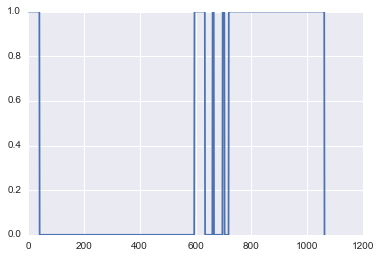

In [87]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
num_gaps = []
window_length = 5
for pos in range(aln.get_alignment_length()):
    temp_aln = aln[:, pos:pos+window_length]
    letters = Counter()
    for i in range(temp_aln.get_alignment_length()):
        letters = letters + Counter(temp_aln[:, i])
    # letters = Counter(aln[:, pos:pos+10])
    
    
    b = bool(int(letters['-']/window_length) > 5)
    num_gaps.append(b)
plt.plot(num_gaps)
# plt.ylim(-1, 3)

In [88]:
# identify the longest sequence of zeros amongst smoothed out data.
from itertools import groupby

def find_midpoint_of_longest_zeros(num_gaps):
    idx_longest_zeros = 0
    longest_zeros = [0]
    pos_counter = 0
    for i, (elm, grp) in enumerate(groupby(num_gaps)):
        grp = list(grp)
        if not elm and len(grp) > len(longest_zeros):
            longest_zeros = grp
            idx_longest_zeros = pos_counter
        pos_counter += len(grp)
    
    return int((idx_longest_zeros + len(longest_zeros)) / 2)

find_midpoint_of_longest_zeros(num_gaps)

298

In [89]:
midpt = find_midpoint_of_longest_zeros(num_gaps)

In [90]:
import pymc3 as pm
import numpy as np

In [91]:
positions = np.arange(0, len(num_gaps))
with pm.Model() as model:
    switchpoint1 = pm.DiscreteUniform('switchpoint1', lower=0, upper=midpt)
    switchpoint2 = pm.DiscreteUniform('switchpoint2', lower=midpt, upper=len(num_gaps))
    
    p = pm.Uniform('p1', lower=0, upper=1, shape=4)

    rate1 = pm.math.switch(positions < switchpoint1, p[0], p[1])
    rate2 = pm.math.switch(positions > switchpoint2, p[2], p[3])
    
    mutations1 = pm.Bernoulli('mutations1', p=rate1, observed=num_gaps)
    mutations2 = pm.Bernoulli('mutations2', p=rate2, observed=num_gaps)

In [92]:
with model:
    step1 = pm.NUTS([p])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = pm.Metropolis([switchpoint1, switchpoint2])
    start = pm.find_MAP()
    trace = pm.sample(5000, start=start, step=[step1, step2])

100%|██████████| 5000/5000 [00:07<00:00, 631.78it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a968358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13aab3c88>]], dtype=object)

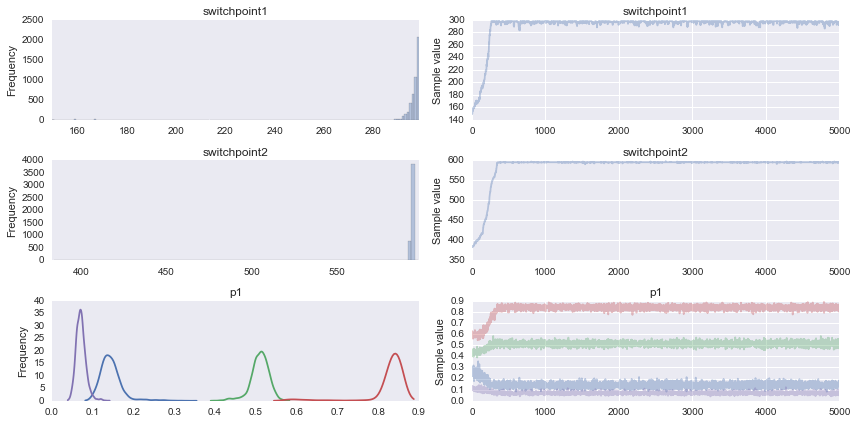

In [93]:
pm.traceplot(trace)

In [94]:
burnin = 1000
start = int(trace['switchpoint1'][burnin:].max(axis=0))
start

298

In [95]:
end = int(trace['switchpoint2'][burnin:].min(axis=0))
end

590

In [128]:
aln_trimmed = aln[:, start:end]
concs = []
muts = []
for i in range(len(aln_trimmed) - 1):
    dist = distance(str(aln_trimmed[i].seq), str(aln_trimmed[-1].seq))
    print(aln_trimmed[i].id, dist)
    
    concs.append(int(aln_trimmed[i].id.split('-')[0])/100)
    muts.append(dist)

0-Mn-fw-EM-28.seq 2
0-Mn-fw-r1-EM-28.seq 162
0-Mn-fw-r2-EM-28.seq 157
0-Mn-fw-r3-EM-28.seq 162
10-Mn-fw-r1-EM-28.seq 170
10-Mn-fw-r3-EM-28.seq 165
15-Mn-fw-EM-28.seq 77
20-Mn-fw-r1-EM-28.seq 161
20-Mn-fw-r2-EM-28.seq 164
20-Mn-fw-r3-EM-28.seq 161
25-Mn-fw-EM-28.seq 56
25-Mn-fw-r1-EM-28.seq 169
25-Mn-fw-r2-EM-28.seq 110
25-Mn-fw-r3-EM-28.seq 147
30-Mn-fw-EM-28.seq 55
30-Mn-fw-r1-EM-28.seq 130
30-Mn-fw-r2-EM-28.seq 147
30-Mn-fw-r3-EM-28.seq 132
35-Mn-fw-EM-28.seq 59
35-Mn-fw-r1-EM-28.seq 152
35-Mn-fw-r2-EM-28.seq 140
35-Mn-fw-r3-EM-28.seq 122
40-Mn-fw-r1-EM-28.seq 157
40-Mn-fw-r2-EM-28.seq 164
50-Mn-fw-r1-EM-28.seq 138
50-Mn-fw-r2-EM-28.seq 101
50-Mn-fw-r3-EM-28.seq 111
55-Mn-fw-EM-28.seq 9


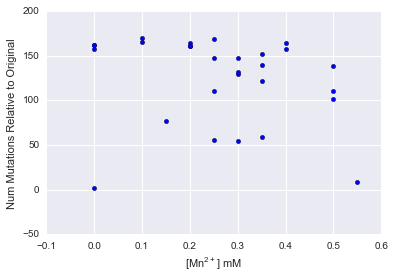

In [105]:
plt.scatter(x=concs, y=muts)
# plt.plot(concs, muts)
plt.ylabel('Num Mutations Relative to Original')
plt.xlabel('$\mathregular{[Mn^{2+}]}$ mM')

In [99]:
import pymc3 as pm

In [117]:
sorted_concs = sorted(list(set(concs)))
indices = dict()
for i, c in enumerate(sorted_concs):
    concs_idx[c] = i
    
indices = []
for c in concs:
    indices.append(concs_idx[c])
indices

[0,
 0,
 0,
 0,
 1,
 1,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 8,
 9]

In [119]:
with pm.Model() as model:
    num_mutations = pm.Uniform('num_mutations', 0, 1000, shape=len(sorted_concs))
    variance = pm.HalfCauchy('variance', beta=1, shape=len(sorted_concs))
    
    mu = num_mutations[indices]
    sig = variance[indices]
    
    like = pm.Normal('likelihood', mu=mu, sd=sig, observed=muts)  
    

In [124]:
with model:
    params = pm.variational.advi(n=100000)
    trace = pm.variational.sample_vp(params, draws=10000,)
    

Iteration 0 [0%]: ELBO = -24503697.98
Iteration 10000 [10%]: Average ELBO = -2108444.96
Iteration 20000 [20%]: Average ELBO = -343.18
Iteration 30000 [30%]: Average ELBO = -193.28
Iteration 40000 [40%]: Average ELBO = -189.4
Iteration 50000 [50%]: Average ELBO = -187.63
Iteration 60000 [60%]: Average ELBO = -186.5
Iteration 70000 [70%]: Average ELBO = -186.15
Iteration 80000 [80%]: Average ELBO = -185.85
Iteration 90000 [90%]: Average ELBO = -185.57
Finished [100%]: Average ELBO = -185.87


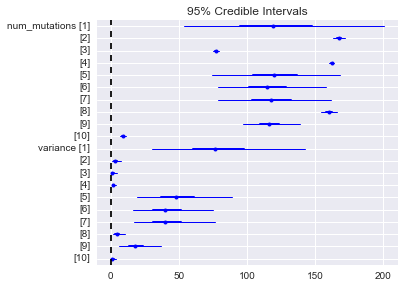

In [126]:
pm.forestplot(trace)